# Procesamiento de Imágenes satelitales

## Información sobre estructura de archivos NC

1) Importación de librerías

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd
from pyproj import Proj
import random

2) Seleccionar las rutas de las imágenes

In [2]:
ruta_base = "../data/raw/imagenes_satelitales/"

3) Creamos la visualización

Comparando:
 -> Caso Positivo: 2024-02-25_granizo
 -> Caso Negativo: 2021-06-26_no_granizo


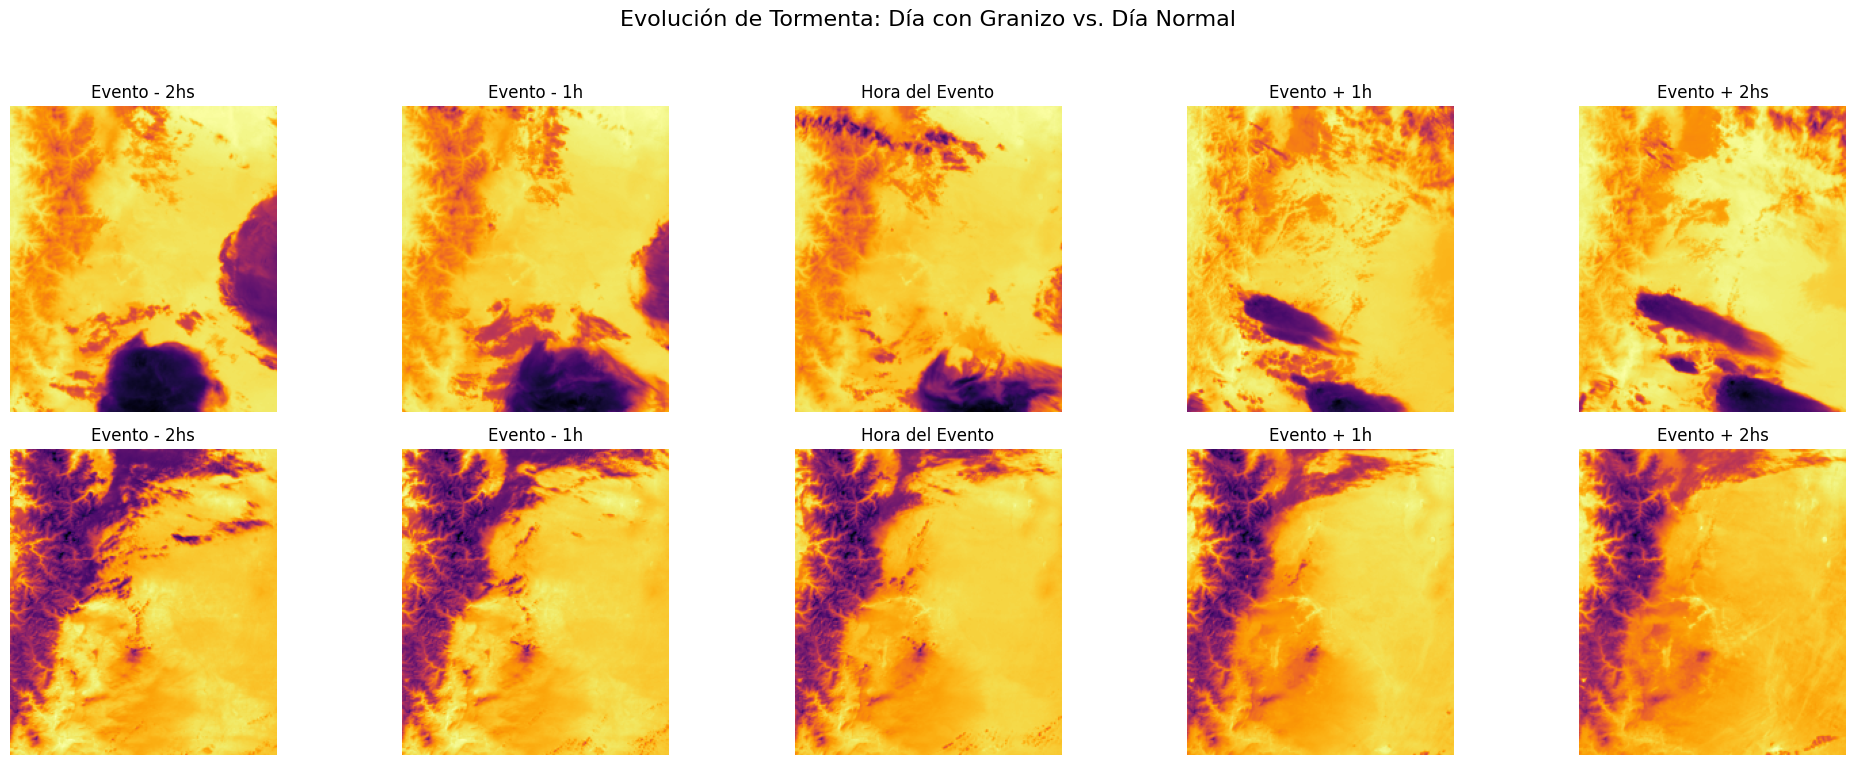

In [6]:
try:
    todas_las_carpetas = [f for f in os.listdir(ruta_base) if os.path.isdir(os.path.join(ruta_base, f))]
    
    carpetas_granizo = [f for f in todas_las_carpetas if '_granizo' in f and '_no_granizo' not in f]
    carpetas_no_granizo = [f for f in todas_las_carpetas if '_no_granizo' in f]
    # =================================

    # --- 3. Seleccionar carpetas de ejemplo AL AZAR ---
    carpeta_granizo_ejemplo = random.choice(carpetas_granizo)
    carpeta_no_granizo_ejemplo = random.choice(carpetas_no_granizo)
    print(f"Comparando:\n -> Caso Positivo: {carpeta_granizo_ejemplo}\n -> Caso Negativo: {carpeta_no_granizo_ejemplo}")

    # --- 4. Función reutilizable para procesar imágenes ---
    def procesar_y_recortar_imagen(ruta_archivo):
        ds = xr.open_dataset(ruta_archivo)
        proj_info = ds.goes_imager_projection
        h_sat = proj_info.perspective_point_height
        ds['x'] = ds['x'] * h_sat
        ds['y'] = ds['y'] * h_sat
        p = Proj(proj='geos', h=h_sat, lon_0=proj_info.longitude_of_projection_origin)
        x1, y1 = p(-70.5, -37.5)
        x2, y2 = p(-66.5, -32.0)
        recorte = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
        return recorte['CMI']

    # --- 5. Crear la Visualización ---
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle('Evolución de Tormenta: Día con Granizo vs. Día Normal', fontsize=16)
    titulos_tiempo = ['Evento - 2hs', 'Evento - 1h', 'Hora del Evento', 'Evento + 1h', 'Evento + 2hs']

    archivos_granizo = sorted(os.listdir(os.path.join(ruta_base, carpeta_granizo_ejemplo)))
    archivos_no_granizo = sorted(os.listdir(os.path.join(ruta_base, carpeta_no_granizo_ejemplo)))

    axes[0, 0].set_ylabel('Día con Granizo', fontsize=12)
    for i in range(5):
        ruta_completa = os.path.join(ruta_base, carpeta_granizo_ejemplo, archivos_granizo[i])
        imagen_data = procesar_y_recortar_imagen(ruta_completa)
        axes[0, i].imshow(imagen_data, cmap='inferno')
        axes[0, i].set_title(titulos_tiempo[i])
        axes[0, i].axis('off')

    axes[1, 0].set_ylabel('Día sin Granizo', fontsize=12)
    for i in range(5):
        ruta_completa = os.path.join(ruta_base, carpeta_no_granizo_ejemplo, archivos_no_granizo[i])
        imagen_data = procesar_y_recortar_imagen(ruta_completa)
        axes[1, i].imshow(imagen_data, cmap='inferno')
        axes[1, i].set_title(titulos_tiempo[i])
        axes[1, i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"❌ Ocurrió un error: {e}. Revisa que la carpeta '{ruta_base}' no esté vacía y contenga carpetas de ambos tipos.")

## Otras ejemplificaciones

Importar rutas

In [13]:
ruta_base = "../data/raw/imagenes_satelitales/"
carpeta_granizo = "2017-03-27_granizo/"
carpeta_no_granizo = "2024-12-22_no_granizo/" # Elegimos una de las que se descargó

Comparando:
 -> Caso Positivo: 2023-11-28_granizo
 -> Caso Negativo: 2019-09-12_no_granizo


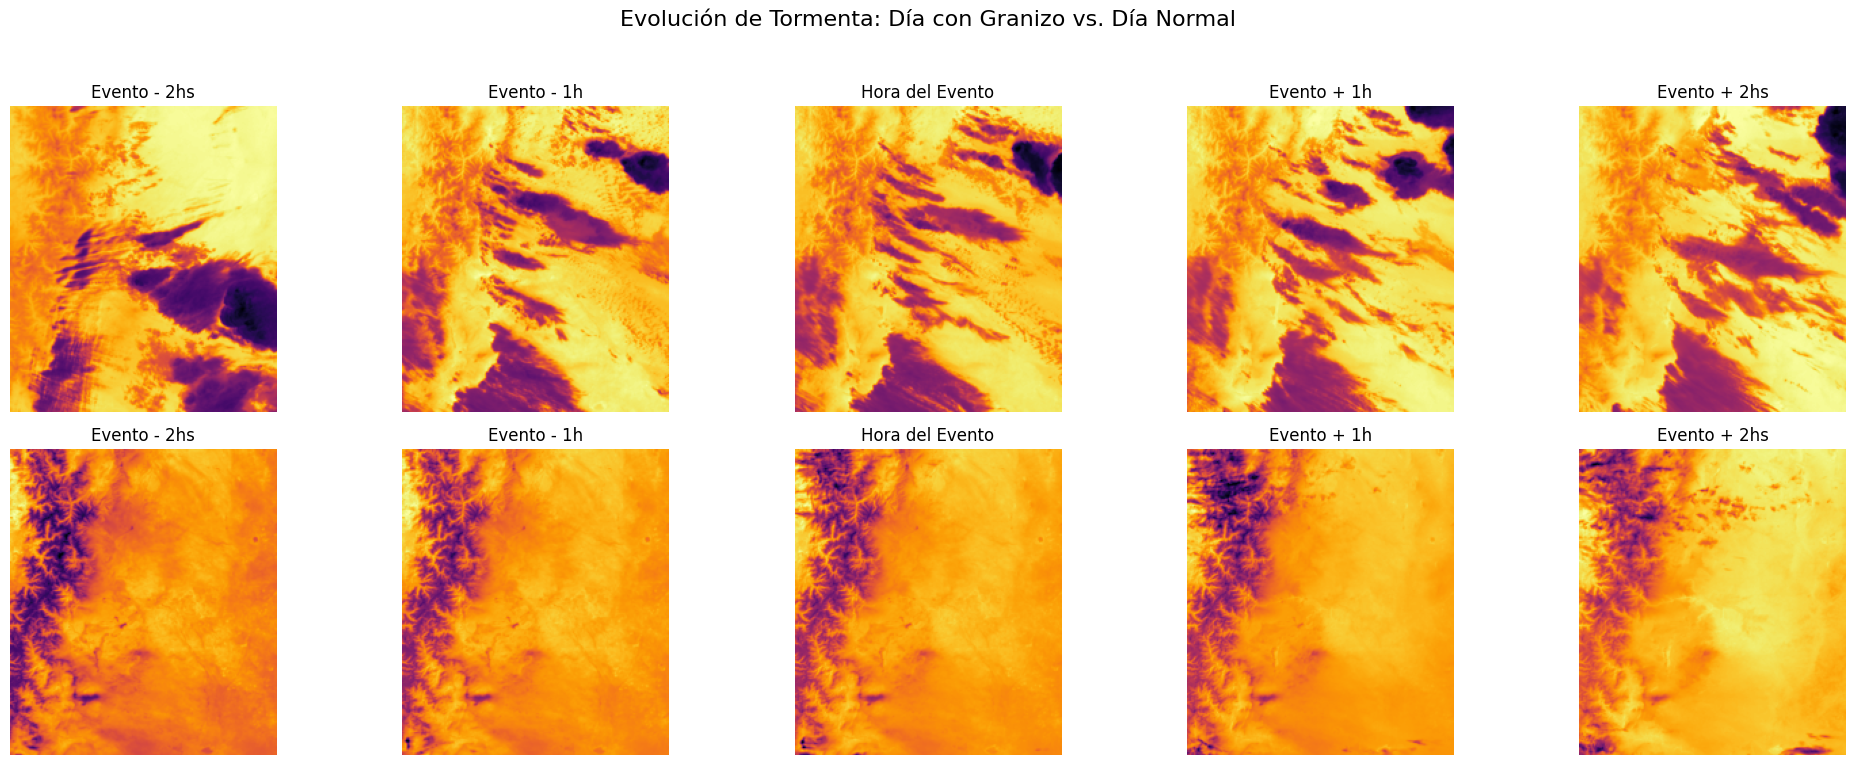

In [7]:
try:
    todas_las_carpetas = [f for f in os.listdir(ruta_base) if os.path.isdir(os.path.join(ruta_base, f))]
    
    carpetas_granizo = [f for f in todas_las_carpetas if '_granizo' in f and '_no_granizo' not in f]
    carpetas_no_granizo = [f for f in todas_las_carpetas if '_no_granizo' in f]
    # =================================

    # --- 3. Seleccionar carpetas de ejemplo AL AZAR ---
    carpeta_granizo_ejemplo = random.choice(carpetas_granizo)
    carpeta_no_granizo_ejemplo = random.choice(carpetas_no_granizo)
    print(f"Comparando:\n -> Caso Positivo: {carpeta_granizo_ejemplo}\n -> Caso Negativo: {carpeta_no_granizo_ejemplo}")

    # --- 4. Función reutilizable para procesar imágenes ---
    def procesar_y_recortar_imagen(ruta_archivo):
        ds = xr.open_dataset(ruta_archivo)
        proj_info = ds.goes_imager_projection
        h_sat = proj_info.perspective_point_height
        ds['x'] = ds['x'] * h_sat
        ds['y'] = ds['y'] * h_sat
        p = Proj(proj='geos', h=h_sat, lon_0=proj_info.longitude_of_projection_origin)
        x1, y1 = p(-70.5, -37.5)
        x2, y2 = p(-66.5, -32.0)
        recorte = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
        return recorte['CMI']

    # --- 5. Crear la Visualización ---
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    fig.suptitle('Evolución de Tormenta: Día con Granizo vs. Día Normal', fontsize=16)
    titulos_tiempo = ['Evento - 2hs', 'Evento - 1h', 'Hora del Evento', 'Evento + 1h', 'Evento + 2hs']

    archivos_granizo = sorted(os.listdir(os.path.join(ruta_base, carpeta_granizo_ejemplo)))
    archivos_no_granizo = sorted(os.listdir(os.path.join(ruta_base, carpeta_no_granizo_ejemplo)))

    axes[0, 0].set_ylabel('Día con Granizo', fontsize=12)
    for i in range(5):
        ruta_completa = os.path.join(ruta_base, carpeta_granizo_ejemplo, archivos_granizo[i])
        imagen_data = procesar_y_recortar_imagen(ruta_completa)
        axes[0, i].imshow(imagen_data, cmap='inferno')
        axes[0, i].set_title(titulos_tiempo[i])
        axes[0, i].axis('off')

    axes[1, 0].set_ylabel('Día sin Granizo', fontsize=12)
    for i in range(5):
        ruta_completa = os.path.join(ruta_base, carpeta_no_granizo_ejemplo, archivos_no_granizo[i])
        imagen_data = procesar_y_recortar_imagen(ruta_completa)
        axes[1, i].imshow(imagen_data, cmap='inferno')
        axes[1, i].set_title(titulos_tiempo[i])
        axes[1, i].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"❌ Ocurrió un error: {e}. Revisa que la carpeta '{ruta_base}' no esté vacía y contenga carpetas de ambos tipos.")

## Mapa compuesto estaciones y tormenta de granizo

Importar librerías

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import pandas as pd
from pyproj import Proj
import random

Cargar la información necesaria

In [9]:
ruta_base = "../data/raw/imagenes_satelitales/"

DataFrame con la info de nuestras estaciones

In [10]:
# DataFrame con la info de nuestras estaciones
stations_info_data = {
    'station_name': ['MENDOZA AERO', 'SAN MARTIN', 'MENDOZA OBSERVATORIO', 'MALARGUE', 'SAN RAFAEL'],
    'latitude': [-32.83, -33.08, -32.9, -35.48, -34.58],
    'longitude': [-68.78, -68.48, -68.87, -69.58, -68.33]
}
df_stations = pd.DataFrame(stations_info_data)

Crear la figura

Visualizando la secuencia del evento: 2021-02-17_granizo/


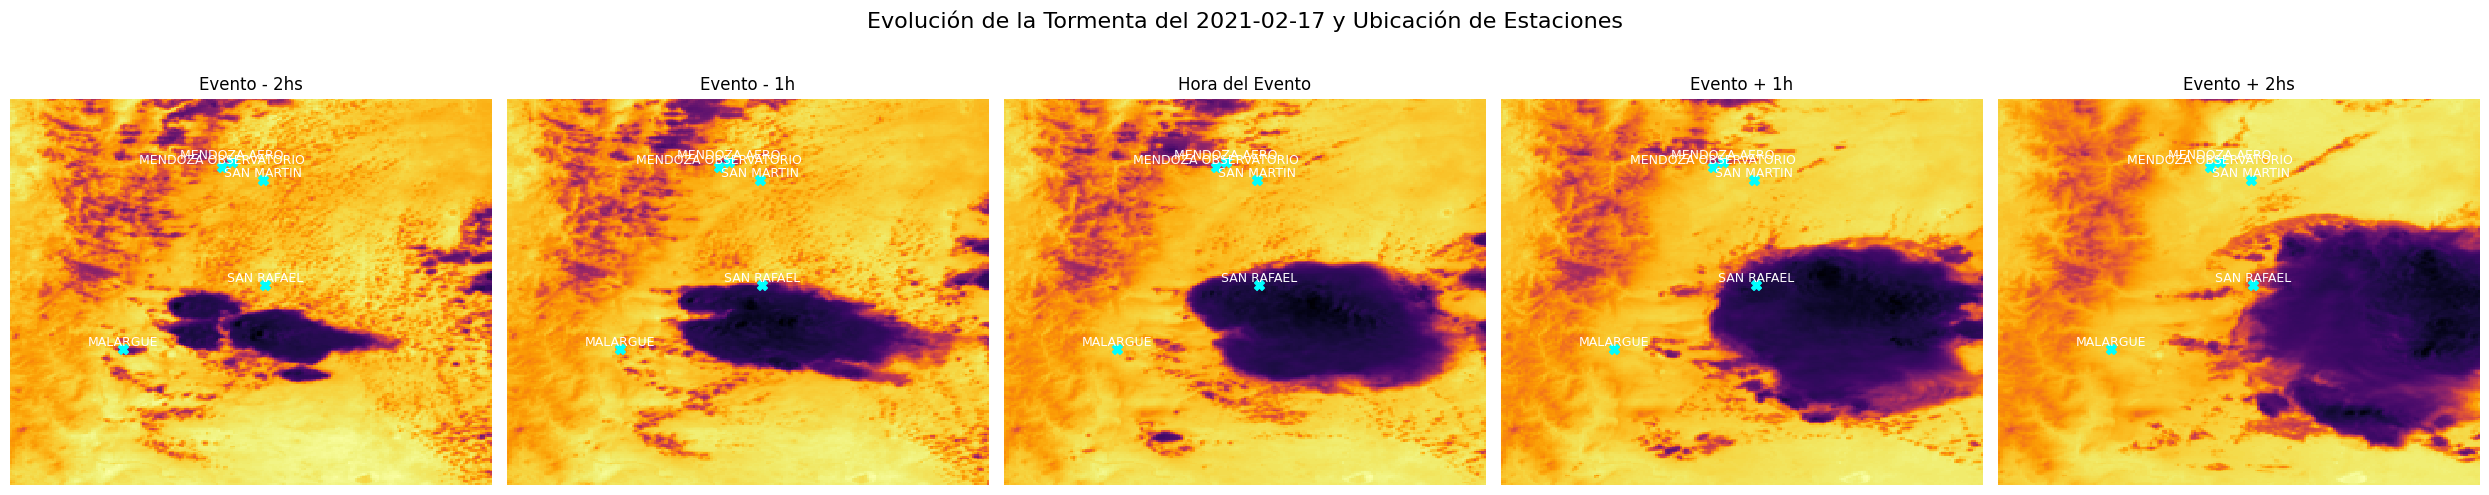

In [19]:
# Seleccionamos una carpeta de un evento de granizo que se haya descargado
carpeta_granizo_ejemplo = "2021-02-17_granizo/" # Se puede cambiar a otra
print(f"Visualizando la secuencia del evento: {carpeta_granizo_ejemplo}")

# --- 2. Crear la figura ---
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle(f'Evolución de la Tormenta del {carpeta_granizo_ejemplo.split("_")[0]} y Ubicación de Estaciones', fontsize=16)
titulos_tiempo = ['Evento - 2hs', 'Evento - 1h', 'Hora del Evento', 'Evento + 1h', 'Evento + 2hs']

# --- 3. Bucle para graficar la secuencia ---
try:
    archivos_granizo = sorted(os.listdir(os.path.join(ruta_base, carpeta_granizo_ejemplo)))
    if len(archivos_granizo) < 5:
        raise ValueError("La carpeta no contiene las 5 imágenes necesarias.")

    for i, nombre_archivo in enumerate(archivos_granizo):
        # --- Cargar y recortar la imagen (igual que antes) ---
        ruta_completa = os.path.join(ruta_base, carpeta_granizo_ejemplo, nombre_archivo)
        ds = xr.open_dataset(ruta_completa)
        proj_info = ds.goes_imager_projection
        h_sat = proj_info.perspective_point_height
        ds['x'] = ds['x'] * h_sat
        ds['y'] = ds['y'] * h_sat
        p = Proj(proj='geos', h=h_sat, lon_0=proj_info.longitude_of_projection_origin)
        x1, y1 = p(-70.5, -37.5)
        x2, y2 = p(-66.5, -32.0)
        recorte = ds.sel(x=slice(x1, x2), y=slice(y2, y1))
        
        # --- Graficar la imagen de fondo ---
        ax = axes[i]
        # Usamos el método de ploteo de xarray que maneja las coordenadas automáticamente
        recorte['CMI'].plot.imshow(ax=ax, cmap='inferno', add_colorbar=False)
        ax.set_title(titulos_tiempo[i])
        ax.axis('off')
        
        # === NUEVO: Superponer los puntos de las estaciones ===
        # Convertimos las coordenadas de cada estación al sistema de la imagen
        station_x, station_y = p(df_stations['longitude'].values, df_stations['latitude'].values)
        
        # Dibujamos los puntos en el mapa
        ax.scatter(station_x, station_y, s=50, c='cyan', marker='X', label='Estaciones')
        
        # Añadimos etiquetas de texto a cada punto
        for idx, row in df_stations.iterrows():
            ax.text(station_x[idx], station_y[idx], row['station_name'], fontsize=9, color='white', ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"❌ Ocurrió un error: {e}. Revisa la ruta de la carpeta.")

Como se puede observar, en esta ocasión se generó un mapa que superpone la imagen satelital correspondiente a la banda 13 y las estaciones meteorológicas.

La banda 13 del satélite permite estimar la temperatura de la superficie terrestre y del tope de las nubes. En la representación cromática, los tonos más oscuros (azules intensos cercanos al negro) corresponden a temperaturas más frías en la troposfera.

Adicionalmente, se incorporó la ubicación de las estaciones meteorológicas utilizadas en el proyecto.

En particular, para la fecha 2021-02-17 se observa un evento de tormenta de granizo de gran magnitud, destacado por los daños ocasionados. Para complementar esta visualización, se incluye un registro audiovisual del evento:

Video del evento en Facebook:
https://www.facebook.com/watch/?v=457771142205976

Este análisis confirma que las imágenes satelitales constituyen una herramienta fundamental para el proyecto, especialmente cuando se integran con los datos tabulares disponibles.

## Conclusiones

Lo que estamos viendo en el gráfico es un patrón clarísimo que una red neuronal convoluciónal (CNN) está diseñada para detectar:

1) Fila de Arriba (Día con Granizo):

Evolución: Se ve una clara evolución temporal. La tormenta (la mancha oscura/morada) crece en tamaño e intensidad a medida que se acerca a la "Hora del Evento".

Firma Visual: En la "Hora del Evento" y en "Evento + 1h", la nube muestra un centro de color morado muy oscuro, casi negro. Como ya sabemos, esto representa topes de nubes extremadamente fríos, la firma clásica de una tormenta severa con un updraft (corriente ascendente) lo suficientemente fuerte como para generar granizo.

2) Fila de Abajo (Día sin Granizo):

Evolución: No hay una evolución clara. Vemos nubes dispersas o un cielo mayormente despejado que no cambia significativamente a lo largo de las 5 horas.

Firma Visual: No hay ninguna “explosión” de nubes con topes fríos. El color se mantiene en el rango amarillo/naranja, indicando temperaturas mucho más cálidas. 
